# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [1]:
# Your code here
import pandas as pd
import numpy as np
boston = pd.read_csv('/Users/carrie/IronHack/DAFT_NOV_21_01/module_3/11. Problem_in_ML/boston_data.csv')
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24.0,666.0,20.2,396.90,18.13,14.1
400,51.13580,0.0,18.10,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11,15.0
401,0.01501,90.0,1.21,1.0,0.401,7.923,24.8,5.8850,1.0,198.0,13.6,395.52,3.16,50.0
402,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77,24.7


In [2]:
boston.dtypes

crim       float64
zn         float64
indus      float64
chas       float64
nox        float64
rm         float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [3]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [4]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [5]:
boston['chas'].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

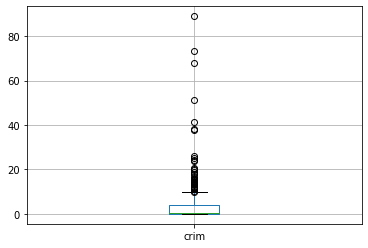

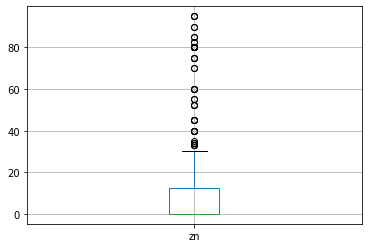

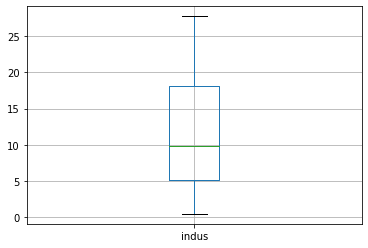

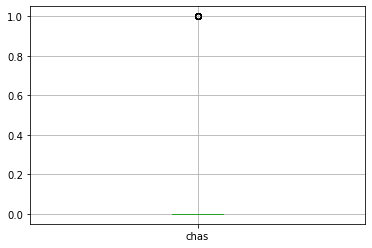

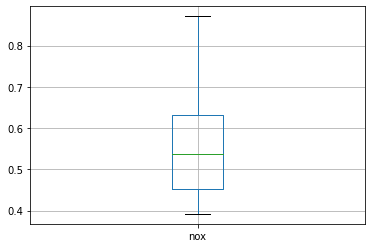

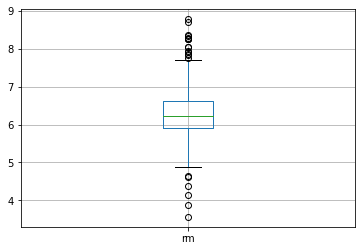

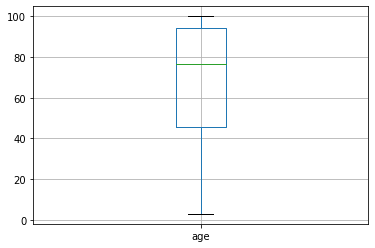

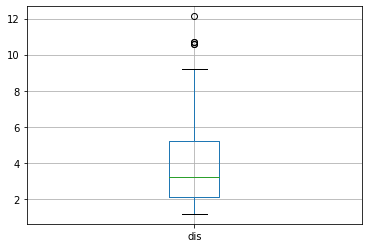

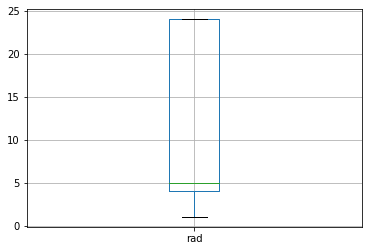

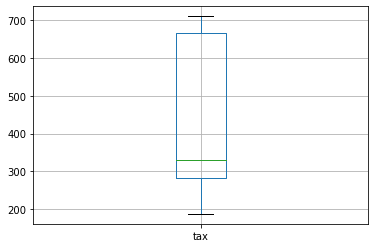

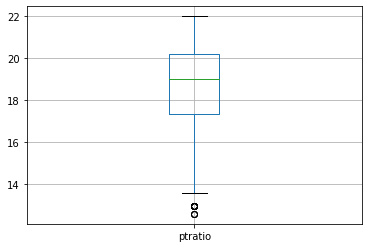

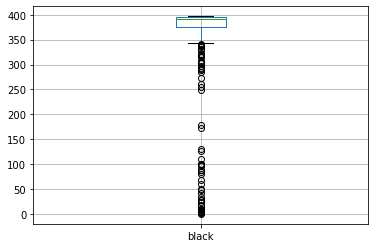

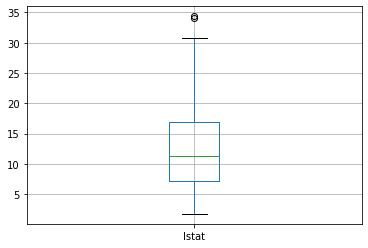

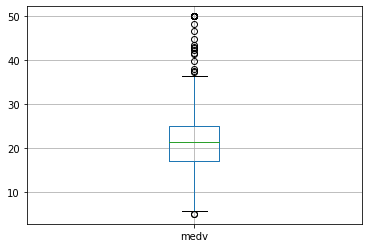

In [6]:
import matplotlib.pyplot as plt

for column in boston:
    plt.figure()
    boston.boxplot([column])

In [7]:
boston.drop(boston[boston['crim']>30].index,axis=0,inplace=True)

In [8]:
boston.drop(boston[boston['dis']>10].index,axis=0,inplace=True)

In [9]:
boston.drop(boston[boston['ptratio']<13].index,axis=0,inplace=True)

In [10]:
boston.drop(boston[boston['lstat']>30].index,axis=0,inplace=True)

In [11]:
boston.drop(boston[boston['medv']<6].index,axis=0,inplace=True)

In [12]:
boston[boston.columns[1:-1]].apply(lambda x: x.corr(boston['medv']))

zn         0.355333
indus     -0.482306
chas       0.136379
nox       -0.410338
rm         0.678491
age       -0.365548
dis        0.237331
rad       -0.375851
tax       -0.460065
ptratio   -0.484242
black      0.359243
lstat     -0.738361
dtype: float64

/Users/carrie/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


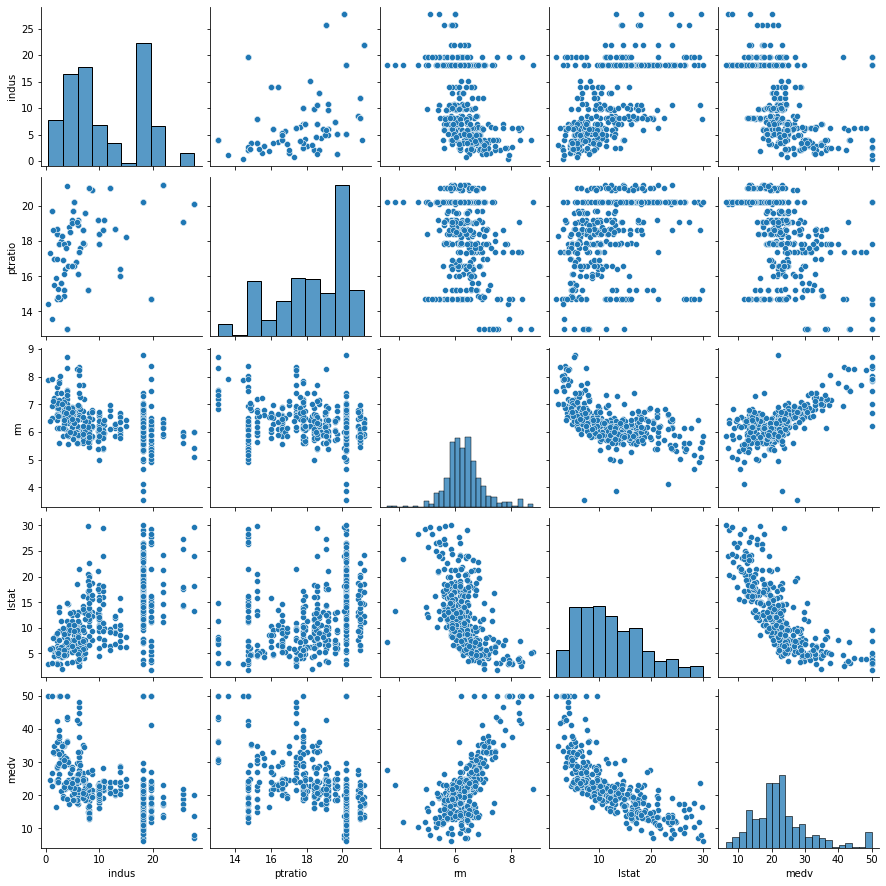

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Calculate and show pairplot
sns.pairplot(boston[['indus','ptratio','rm','lstat','medv']], size=2.5)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

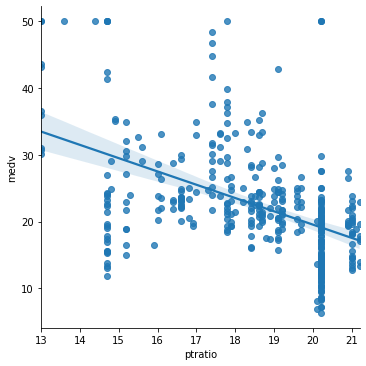

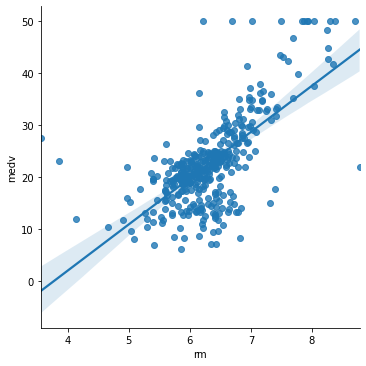

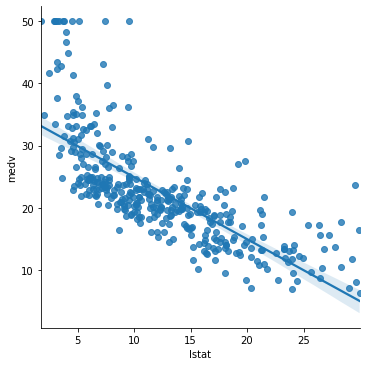

In [14]:
# Your plots here
for i in ['ptratio','rm','lstat']:
    sns.lmplot(x=i, y='medv', data=boston)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [15]:
# Your response here
# higher pratio or rm => higher price
# lower lstat => higher price

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [16]:
# Your response here
# already made above
# tax, but I consider the higher the price, the higher the tax will be, I don't consider really meaningful to include in the model

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [17]:
# Your code here
boston['medv'].describe()

count    382.000000
mean      22.691885
std        8.659861
min        6.300000
25%       17.525000
50%       21.700000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score, completeness_score, homogeneity_score

def performance_metric(y_true, y_pred):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    result = r2_score(y_true, y_pred)
    return result

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [48]:
# Your code here
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

target=boston['medv']
features=boston[['indus','ptratio','rm','lstat']]
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 42)

In [49]:
X_train.shape

(305, 4)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [50]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

Now, plot the score for each tree on the training set and on the testing set.

In [61]:
# Produce a plot with the score for the testing and training for the different max depths

train = []
test = []

for dept in [1,2,4,6,8,10]:
    regr = RandomForestRegressor(max_depth=dept)
    regr.fit(X_train, y_train)
    
    y_train_pred=regr.predict(X_train)
    train.append(performance_metric(y_train,y_train_pred))

    y_test_pred=regr.predict(X_test)
    test.append(performance_metric(y_test,y_test_pred))

print(train)
print(test)

[0.6029477310985659, 0.766393748583296, 0.8872992121723074, 0.9401384587296249, 0.9604173788280527, 0.9679598053820686]
[0.6158145899665577, 0.7277715921370542, 0.7795555753085078, 0.7914145377174279, 0.8036427220997926, 0.7971796819319202]


<AxesSubplot:>

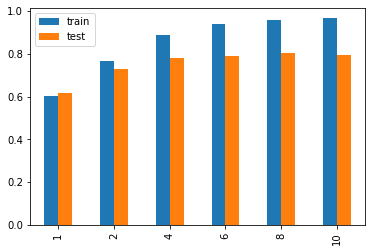

In [62]:
df1 = pd.DataFrame({'train': train, 'test': test}, index=[1,2,4,6,8,10])
df1.plot.bar()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [24]:
# Your response here
# the maximum score is when the param at 4,6,8,10

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [53]:
# Your response here
from sklearn.metrics import explained_variance_score

def performance_metric2(y_true, y_predict):
    result = explained_variance_score(y_true, y_predict)
    return result

In [59]:
train2 = []
test2 = []

for dept in [1,2,4,6,8,10]:
    regr = RandomForestRegressor(max_depth=dept)
    regr.fit(X_train, y_train)
    
    y_train_pred=regr.predict(X_train)
    train2.append(performance_metric2(y_train,y_train_pred))

    y_test_pred=regr.predict(X_test)
    test2.append(performance_metric2(y_test,y_test_pred))

print(train2)
print(test2)

[0.6095253868858137, 0.7748170223517589, 0.8896600079344171, 0.9400277164930545, 0.9575167239458083, 0.9671200436286458]
[0.6211790932330351, 0.7322763188414594, 0.7964567743549956, 0.8008344592268626, 0.7908108074862604, 0.7993209748109229]


<AxesSubplot:>

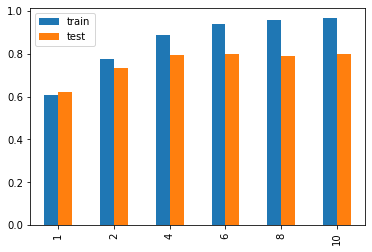

In [60]:
df2 = pd.DataFrame({'train': train2, 'test': test2}, index=[1,2,4,6,8,10])
df2.plot.bar()

In [ ]:
# model is not really suffer from high bias, since those 2 scores are pretty much the same

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [26]:
# Your response here
# when max_depth=4,6,8,10

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

CRIM - per capita crime rate by town\
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\
INDUS - proportion of non-retail business acres per town.\
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\
NOX - nitric oxides concentration (parts per 10 million)\
RM - average number of rooms per dwelling\
AGE - proportion of owner-occupied units built prior to 1940\
DIS - weighted distances to five Boston employment centres\
RAD - index of accessibility to radial highways\
TAX - full-value property-tax rate per $10,000\

PTRATIO - pupil-teacher ratio by town\
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\
LSTAT -  lower status of the population\
MEDV - Median value of owner-occupied homes in $1000's

In [27]:
# Your response here
# many things could change, ex. INDUS, DIS, PTRATIO, MEDV, etc., so it could be not very relevant
# I think it's pretty sufficient
# yes, I think it's pretty robust
# not really, since cretiria will be much diff for prices in rural city